# 5.4.2 Спектр бета частиц

In [1]:
import pandas as pd
import numpy as np
import mygraph as mg

In [2]:
df = pd.read_csv('data.csv', sep='\t')

In [3]:
df.head(3)

,"I, A",N,N-Nb,"p, keV/c","T, keV",mkFermi
0,0.0,1.609,0.019,0.0,0.0,0.0
1,0.2,1.509,-0.081,56.2,3.1,0.0
2,0.4,1.529,-0.061,112.3,12.2,0.0


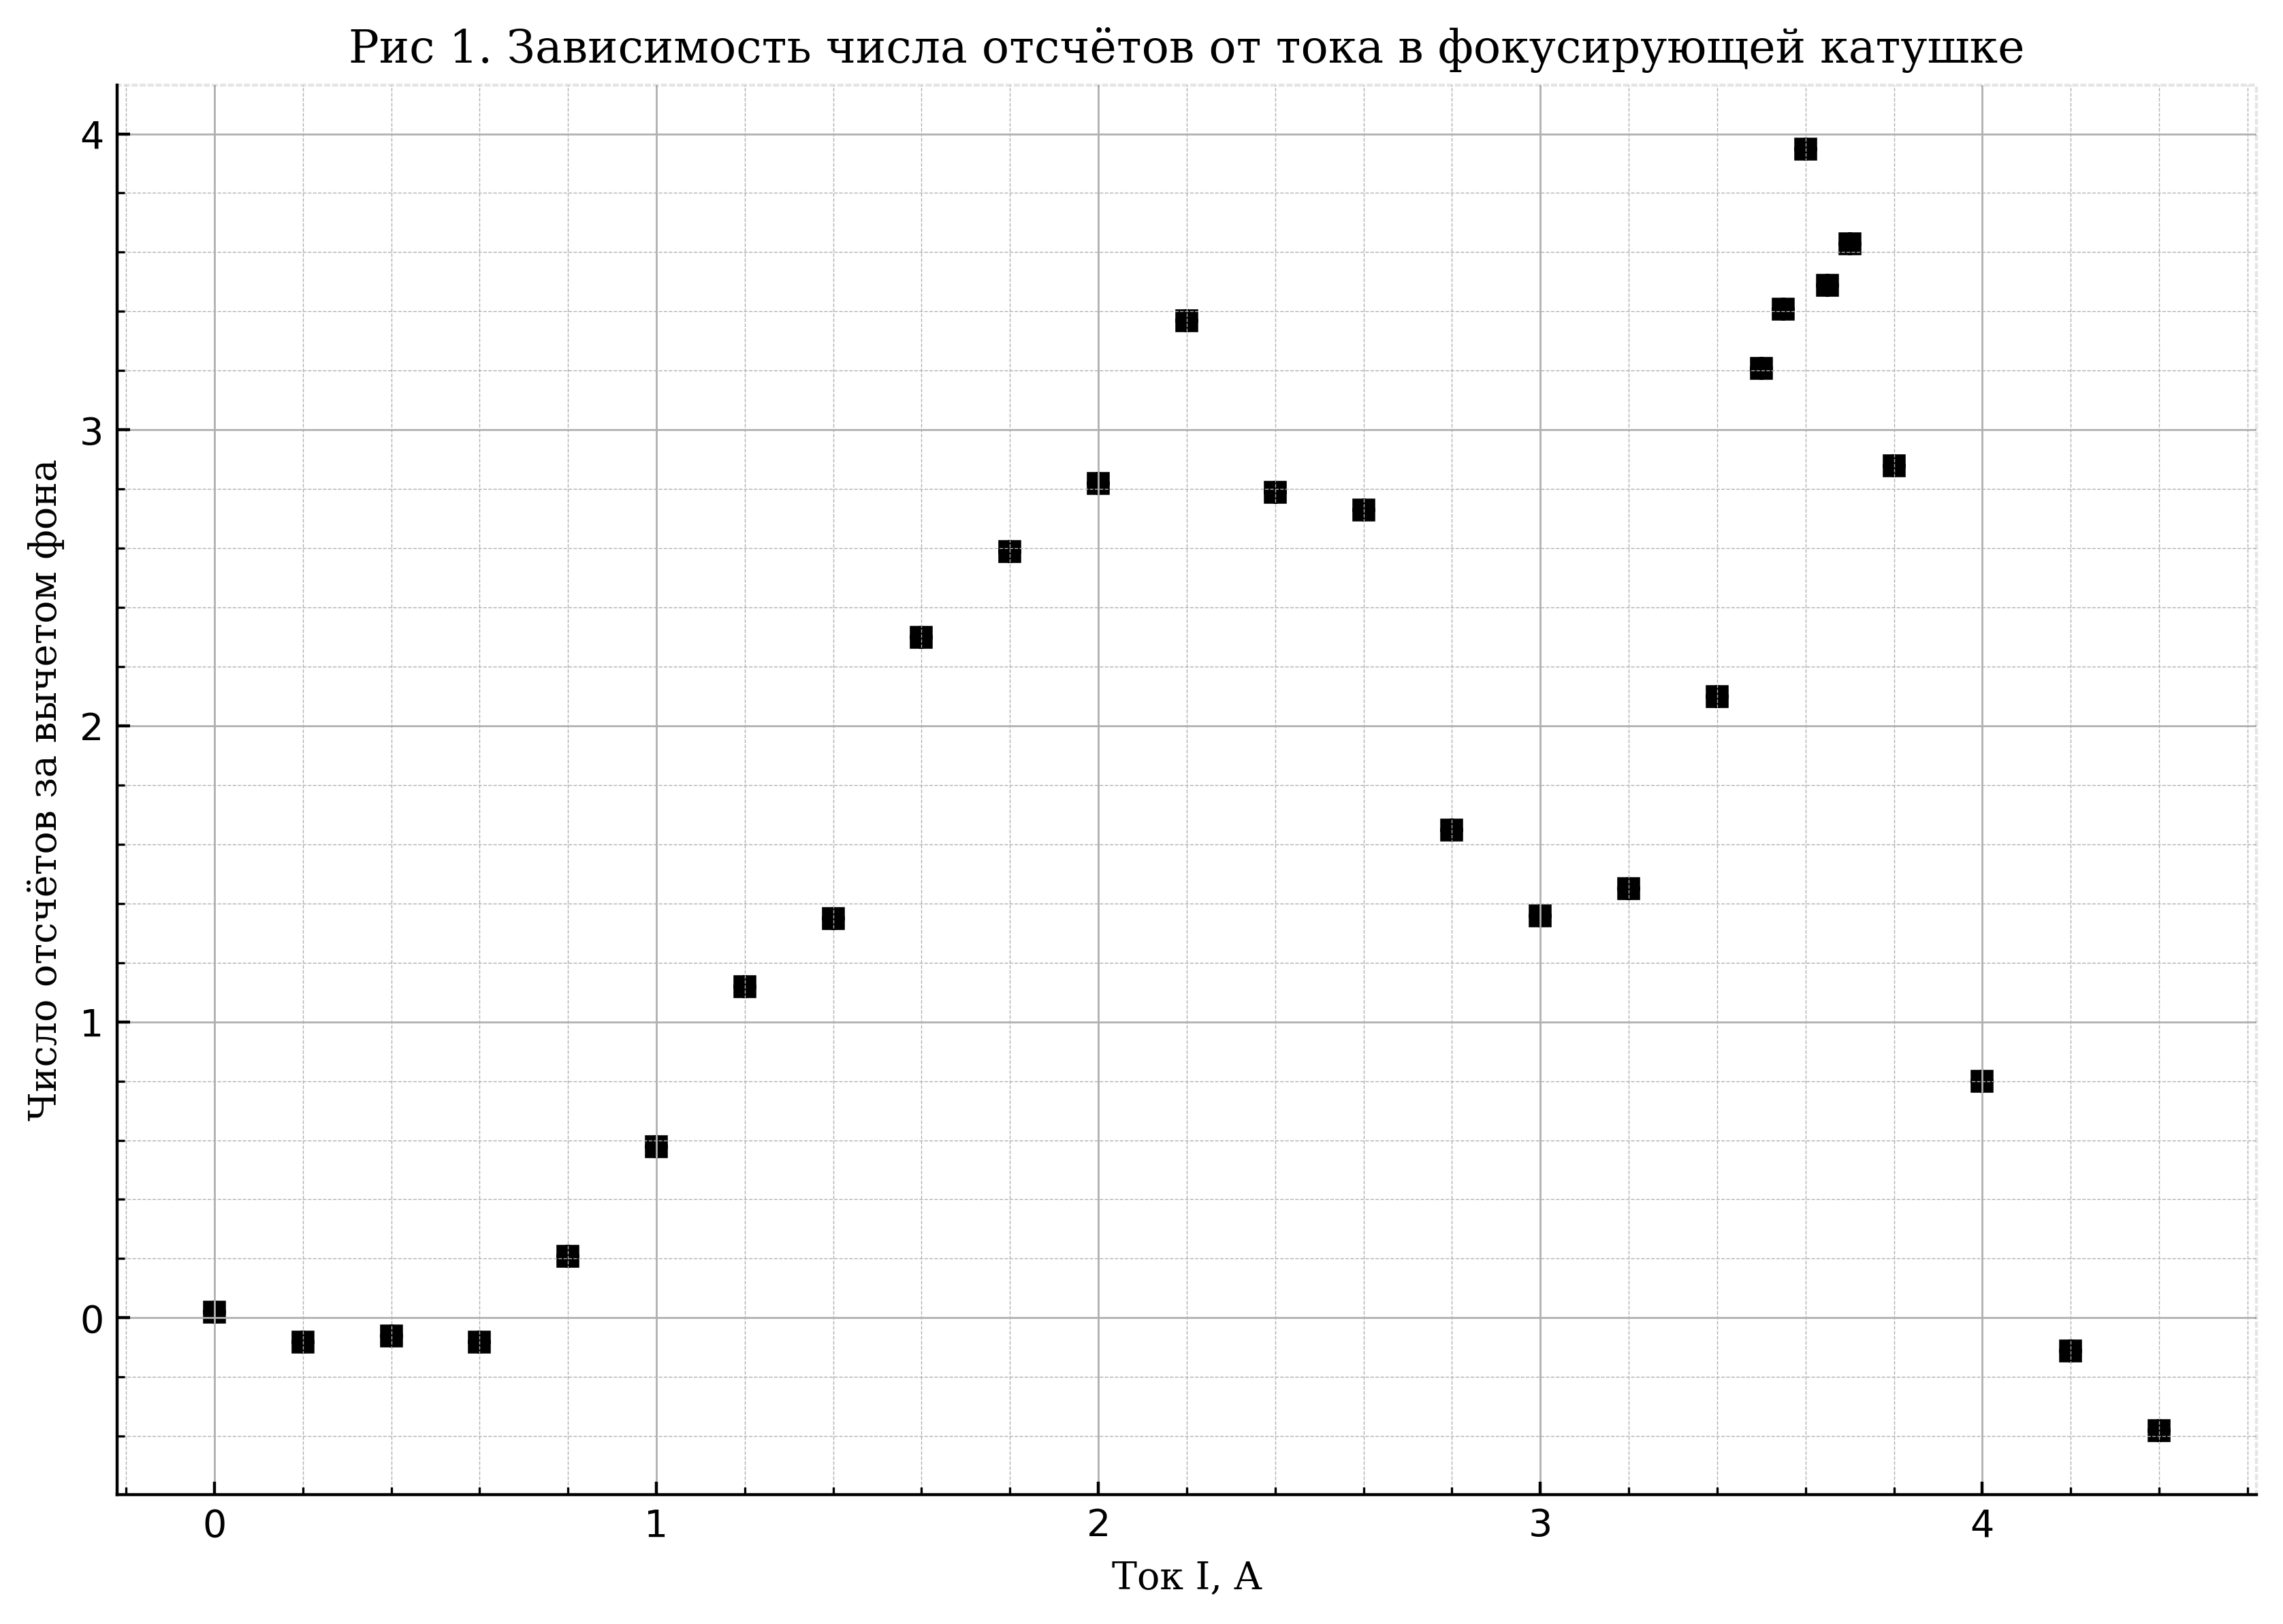

In [4]:
X = df['I, A']
Y = df['N-Nb']

fig = mg.make_figure(dpi_mode='high')
ax = fig.add_subplot()
mg.set_grids(fig)
mg.set_title(ax, 'Зависимость числа отсчётов от тока в фокусирующей катушке')
mg.set_label(ax, 'Ток I, A', 'Число отсчётов за вычетом фона')
mg.draw_errorbar(ax, X, Y)

In [5]:
I_conv = X[np.argmax(Y)]
print(f'Конверсионный пик приходится на ток {I_conv} A')

T_conv = 0.624 # MeV
eps = 0.5 + 0.624 # MeV
c = 3e8
pc_conv = np.sqrt( np.square(eps) - np.square(0.5) ) # MeV
print(f'p_conv = {(pc_conv * 1e3):.5} keV/c') # keV/c
k = pc_conv * 1e3 / I_conv # keV / (c * A)
print(f'k = {k:.4} keV/(c * A)')

Конверсионный пик приходится на ток 3.6 A
p_conv = 1006.7 keV/c
k = 279.6 keV/(c * A)


${m^2c^4 = \varepsilon^2 - p^2c^2 \rightarrow pc = \sqrt{\varepsilon^2 - m^2c^4}}$

${\varepsilon = mc^2 + T}$

p_conv = 1010.7 keV/c


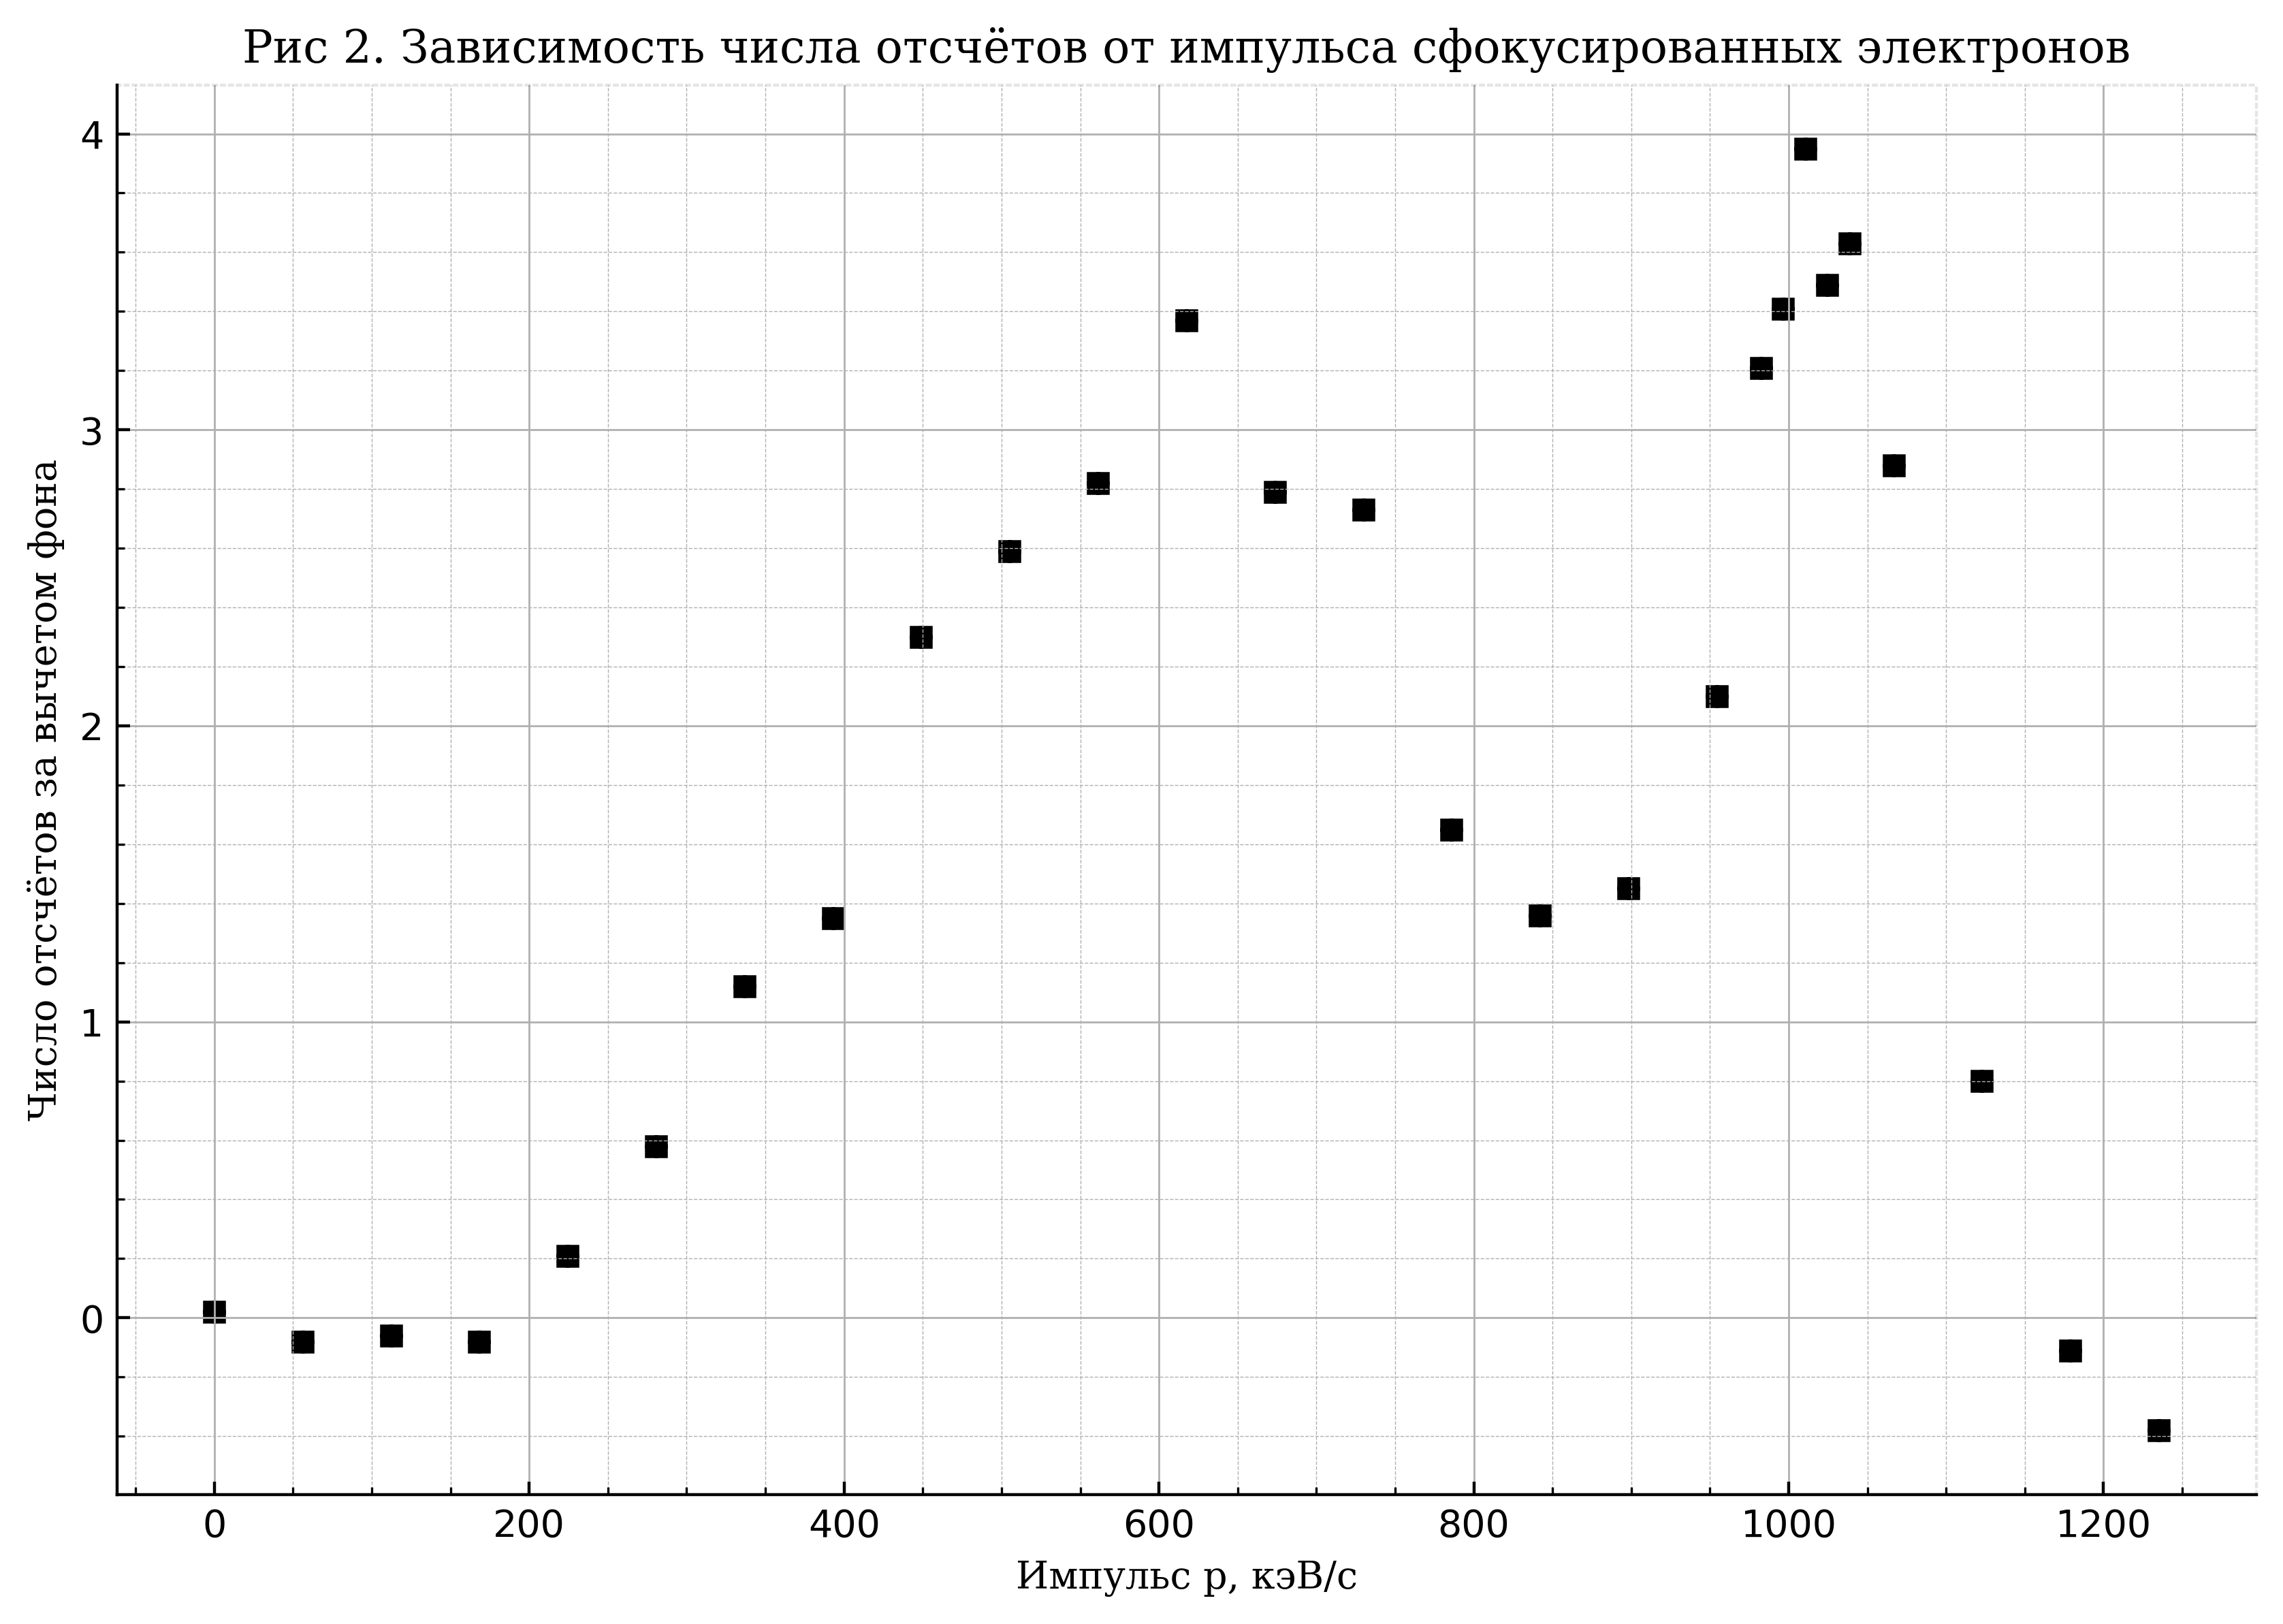

In [6]:
X = df['p, keV/c']
Y = df['N-Nb']

fig = mg.make_figure(dpi_mode='high')
ax = fig.add_subplot()
mg.set_grids(fig)
mg.set_title(ax, 'Зависимость числа отсчётов от импульса сфокусированных электронов')
mg.set_label(ax, 'Импульс p, кэВ/с', 'Число отсчётов за вычетом фона')
mg.draw_errorbar(ax, X, Y)

print(f'p_conv = {X[np.argmax(Y)]} keV/c')

T_conv = 621.6 keV


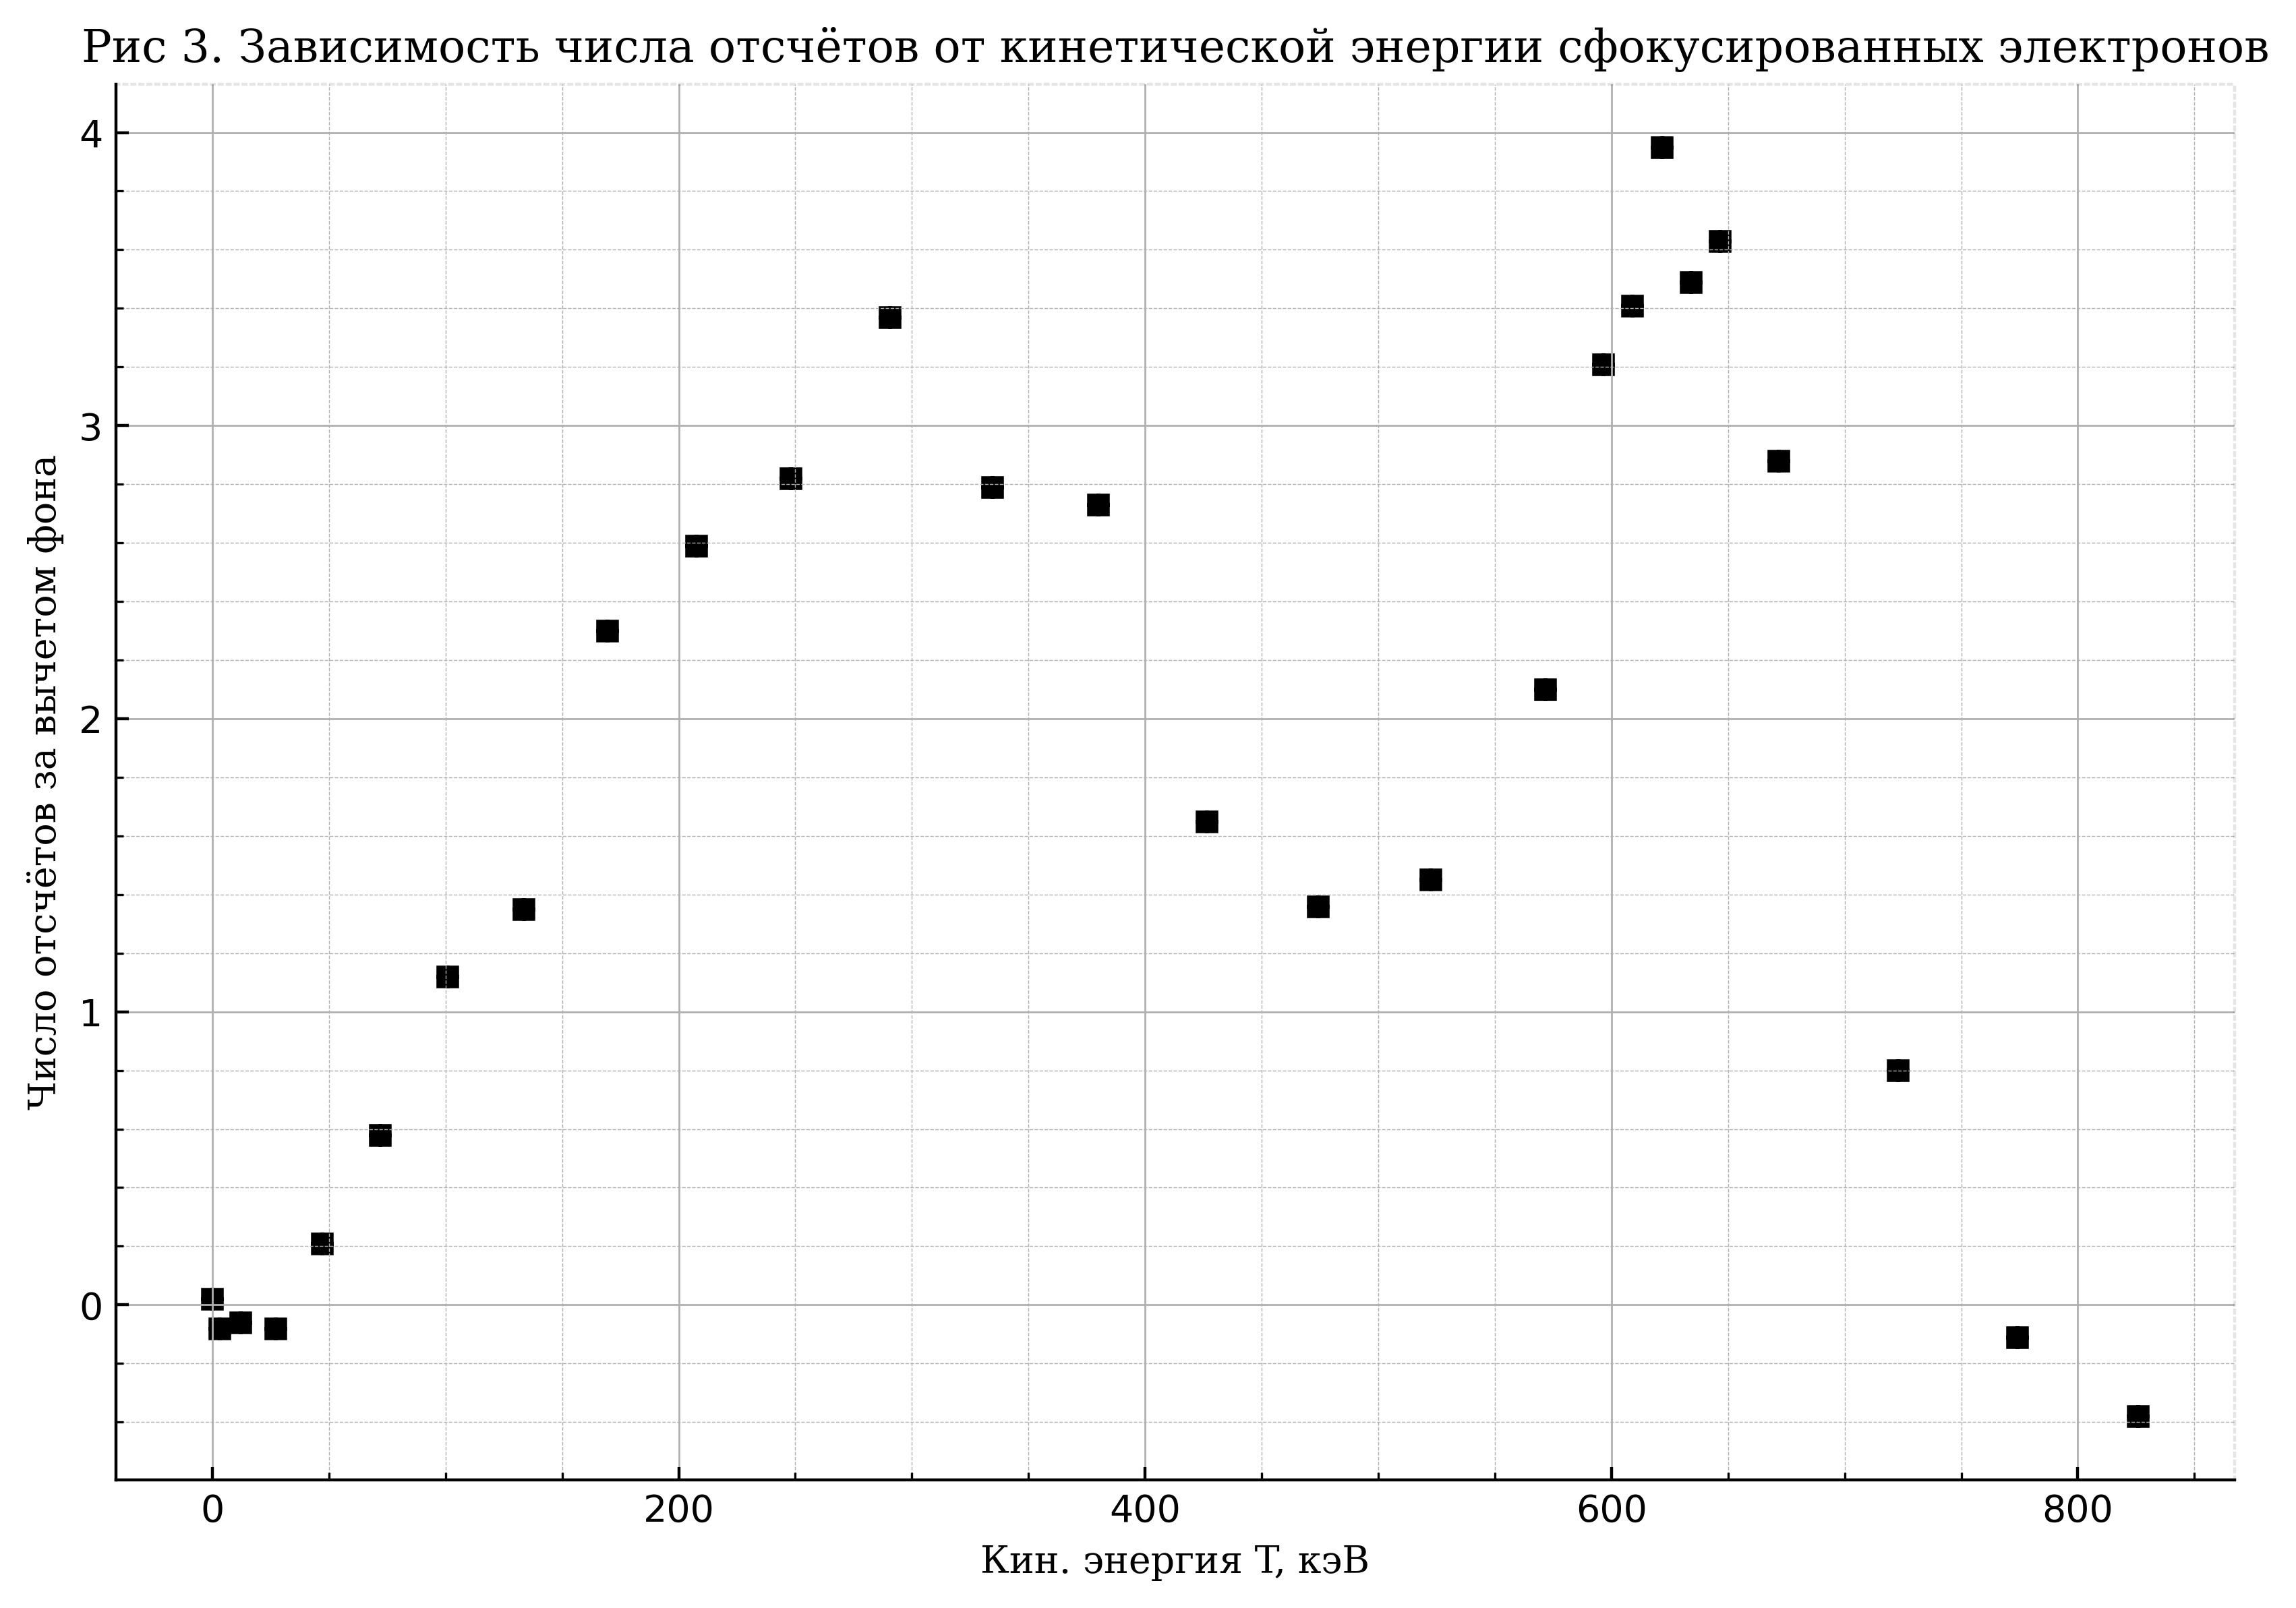

In [7]:
X = df['T, keV']
Y = df['N-Nb']

fig = mg.make_figure(dpi_mode='high')
ax = fig.add_subplot()
mg.set_grids(fig)
mg.set_title(ax, 'Зависимость числа отсчётов от кинетической энергии сфокусированных электронов')
mg.set_label(ax, 'Кин. энергия T, кэВ', 'Число отсчётов за вычетом фона')
mg.draw_errorbar(ax, X, Y)

print(f'T_conv = {X[np.argmax(Y)]} keV')

T_max = 675.6474019663086 keV


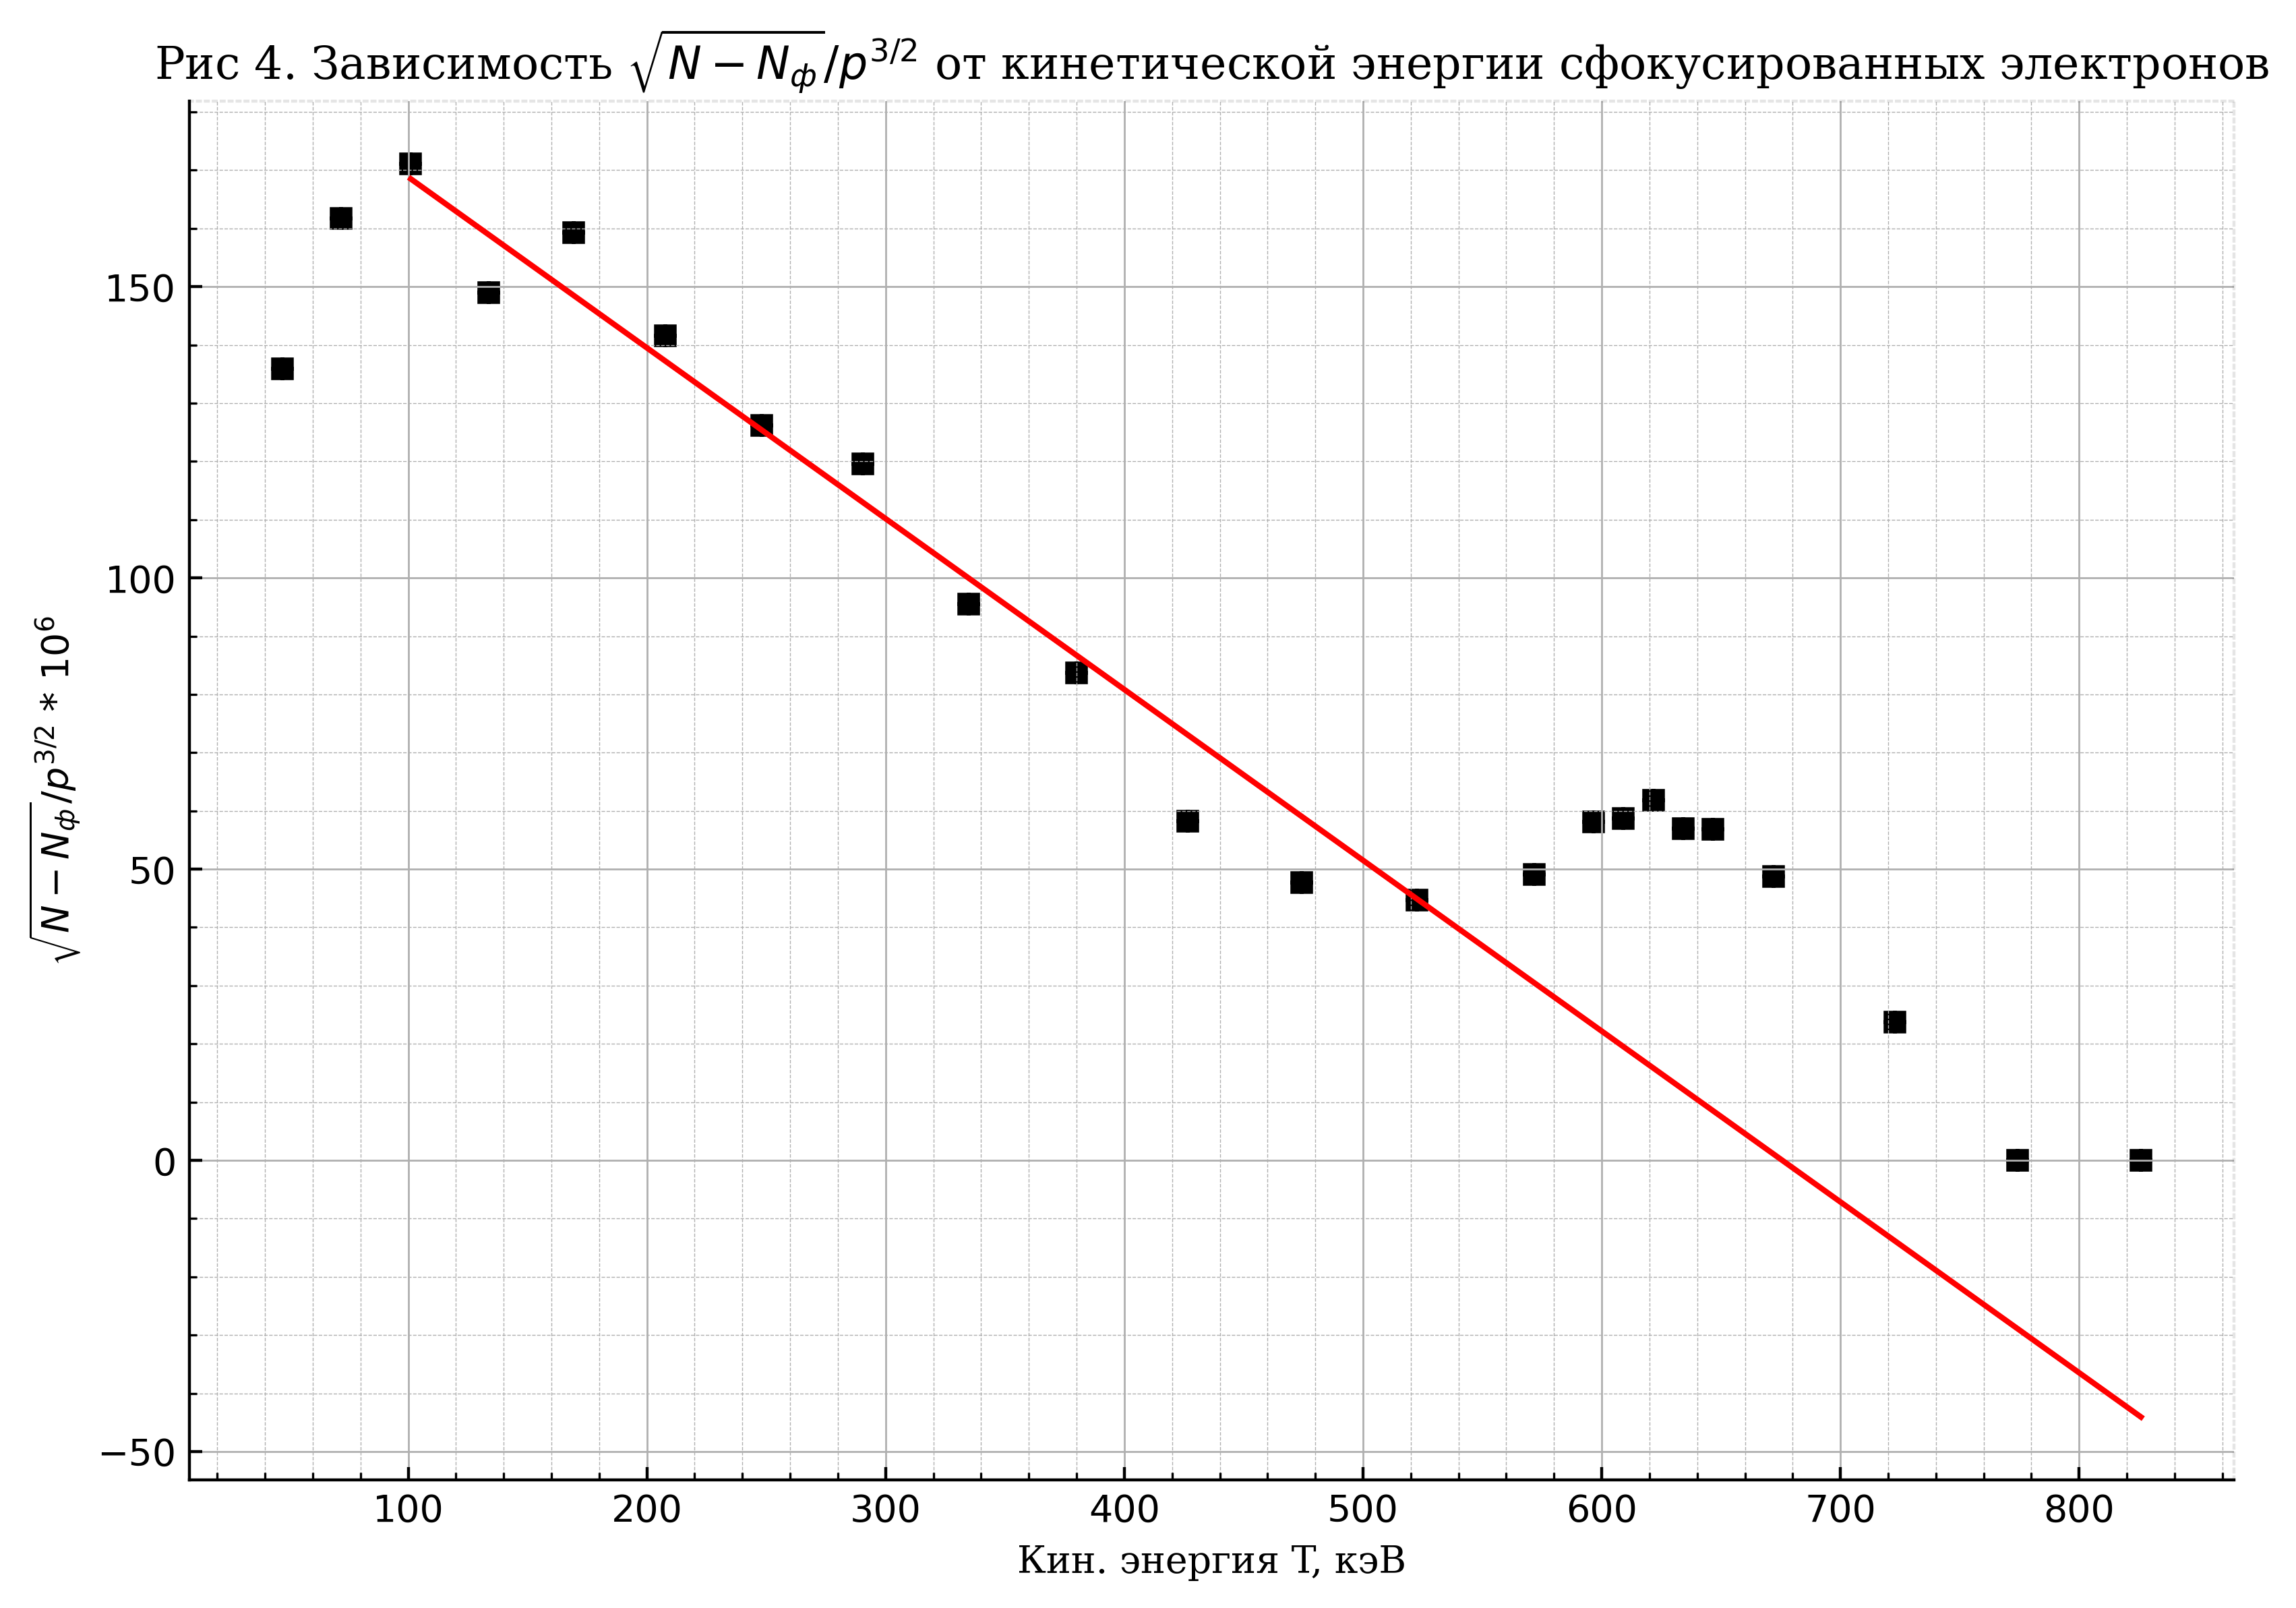

In [8]:
X = df['T, keV'][4:] # В первых четырёх нули, отбрасываем
# Y = np.sqrt(df['N-Nb'])/(pow(df['p, keV/c'], 1.5)) * 1e6
Y = df['mkFermi'][4:]

fig = mg.make_figure(dpi_mode='high')
ax = fig.add_subplot()
mg.set_grids(fig)
mg.set_title(ax, r'Зависимость $\sqrt{N-N_ф}/p^{3/2}$ от кинетической энергии сфокусированных электронов')
mg.set_label(ax, 'Кин. энергия T, кэВ', r'$\sqrt{N-N_ф}/p^{3/2}$ * $10^6$')
mg.draw_errorbar(ax, X, Y)

k, s_k, b, s_b = mg.linls(np.array(X[2:-9]), np.array(Y[2:-9]))
ax.plot(np.array(X[2:]), np.array(X[2:]) * k + b, c='r')
# mg.display_linls(ax)
T_max = -b / k
print(f'T_max = {T_max} keV')